In [5]:
import sys
import os
sys.path.append(os.path.abspath('../'))

In [6]:
!python ../src/database_integration/insert_banks.py


✅ Inserted or skipped: Commercial Bank of Ethiopia
✅ Inserted or skipped: Bank of Abyssinia
✅ Inserted or skipped: Dashen Bank


In [8]:
!python ../src/database_integration/load_reviews_to_db.py

In [11]:
import pandas as pd
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords if not done yet
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load your CSV file - make sure the path is correct
df = pd.read_csv("../notebooks/data/processed/all_banks_combined.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Define sentiment category based on rating
def sentiment_category(r):
    if r <= 2:
        return 'Negative'
    elif r == 3:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment'] = df['rating'].apply(sentiment_category)

def extract_keywords(text_series, top_n=10):
    all_words = ' '.join(text_series).lower().split()
    filtered_words = [w for w in all_words if w.isalpha() and w not in stop_words]
    counter = Counter(filtered_words)
    return counter.most_common(top_n)

banks = df['bank'].unique()

for bank in banks:
    pos_reviews = df[(df['bank'] == bank) & (df['sentiment'] == 'Positive')]['review']
    neg_reviews = df[(df['bank'] == bank) & (df['sentiment'] == 'Negative')]['review']
    
    pos_keywords = extract_keywords(pos_reviews)
    neg_keywords = extract_keywords(neg_reviews)
    
    print(f"\n=== {bank} ===")
    print("Top Positive Drivers:", [k for k, v in pos_keywords])
    print("Top Negative Pain Points:", [k for k, v in neg_keywords])



=== Commercial Bank of Ethiopia ===
Top Positive Drivers: ['app', 'good', 'best', 'cbe', 'banking', 'nice', 'mobile', 'easy', 'use', 'fast']
Top Negative Pain Points: ['app', 'banking', 'bank', 'cbe', 'screenshot', 'developer', 'one', 'security', 'like', 'network']

=== Bank of Abyssinia ===
Top Positive Drivers: ['app', 'boa', 'good', 'best', 'bank', 'use', 'great', 'please', 'developer', 'mobile']
Top Negative Pain Points: ['app', 'bank', 'mobile', 'please', 'even', 'worst', 'work', 'use', 'banking', 'working']

=== Dashen Bank ===
Top Positive Drivers: ['app', 'dashen', 'super', 'banking', 'bank', 'one', 'easy', 'best', 'amazing', 'use']
Top Negative Pain Points: ['app', 'working', 'good', 'bank', 'ever', 'slow', 'work', 'fix', 'super', 'many']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


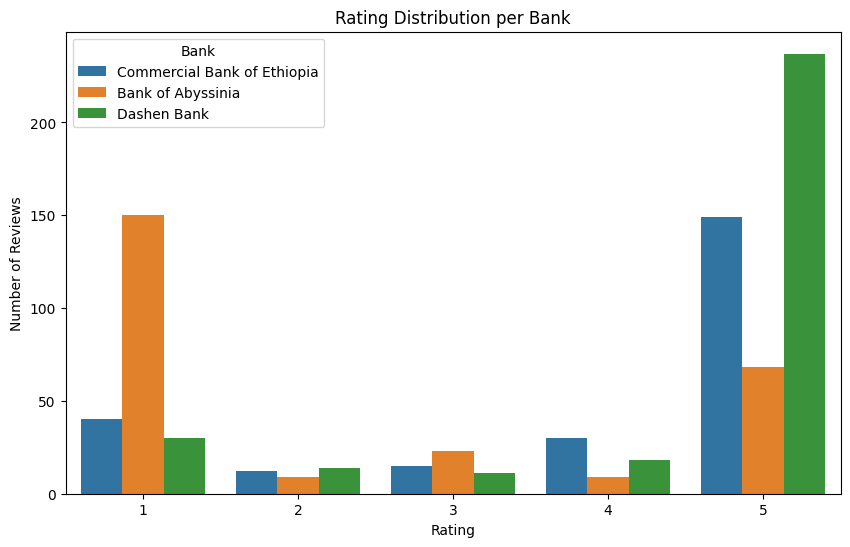

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', hue='bank')
plt.title('Rating Distribution per Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.show()


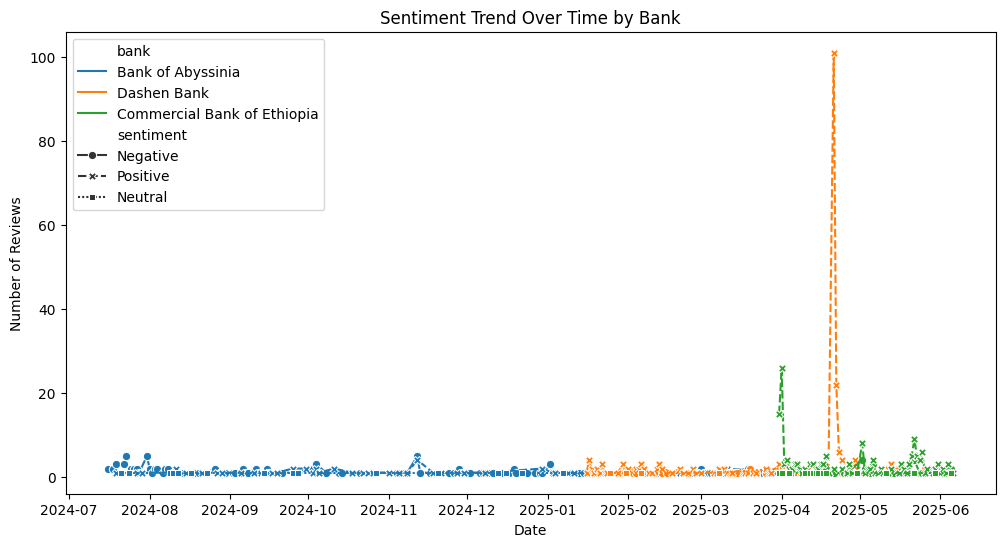

In [13]:
sentiment_time = df.groupby(['date', 'bank', 'sentiment']).size().reset_index(name='count')

plt.figure(figsize=(12,6))
sns.lineplot(data=sentiment_time, x='date', y='count', hue='bank', style='sentiment', markers=True)
plt.title('Sentiment Trend Over Time by Bank')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


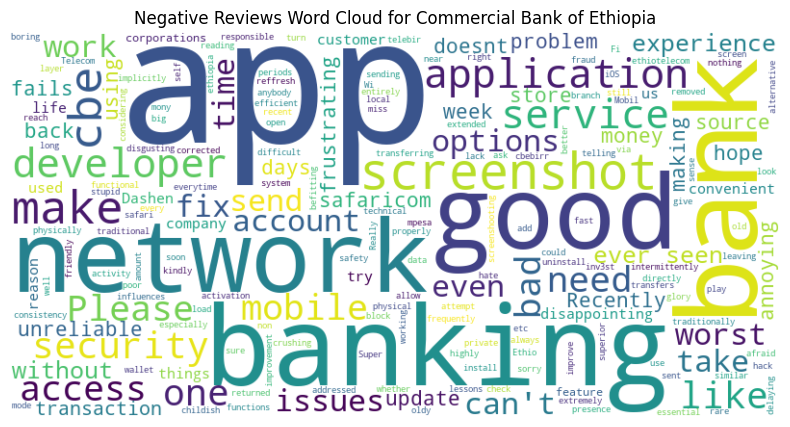

In [14]:
from wordcloud import WordCloud

bank_name = 'Commercial Bank of Ethiopia'  # Change to desired bank
text = ' '.join(df[(df['bank'] == bank_name) & (df['sentiment'] == 'Negative')]['review'])

wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Negative Reviews Word Cloud for {bank_name}')
plt.show()
